<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

In [0]:
root_dir = './drive/My Drive/datasets/cats_and_dogs/train'
base_dir = './drive/My Drive/datasets/cats_and_dogs_small'
# os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


# os.mkdir(train_dir)
# os.mkdir(validation_dir)
# os.mkdir(test_dir)
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)
# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

In [0]:
# 데이터 복사

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(root_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(root_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(root_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(root_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(root_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(root_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
model = models.Sequential([
                           layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128,(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128,(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(512,activation='relu'),
                           layers.Dense(1, activation='sigmoid')                                                
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# 데이터 전처리
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_samll_1.h5')

Epoch 1/30
100/100 [==============================] - 108s 1s/step - loss: 0.6858 - acc: 0.5490 - val_loss: 0.6781 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6498 - acc: 0.6240 - val_loss: 0.6425 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 107s 1s/step - loss: 0.5999 - acc: 0.6850 - val_loss: 0.7797 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5574 - acc: 0.7065 - val_loss: 0.6052 - val_acc: 0.6220
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.5363 - acc: 0.7365 - val_loss: 0.4877 - val_acc: 0.7180
Epoch 6/30
100/100 [==============================] - 107s 1s/step - loss: 0.5075 - acc: 0.7565 - val_loss: 0.5835 - val_acc: 0.7170
Epoch 7/30
100/100 [==============================] - 107s 1s/step - loss: 0.4790 - acc: 0.7660 - val_loss: 0.5683 - val_acc: 0.7030
Epoch 8/30
100/100 [==============================] - 107s 1s/step - 

In [0]:
# 데이터 증식
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

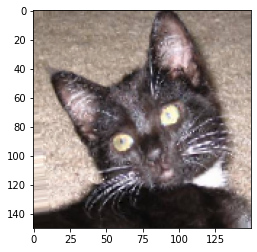

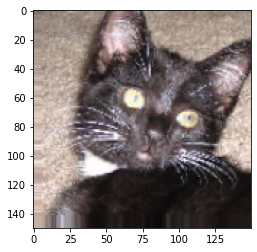

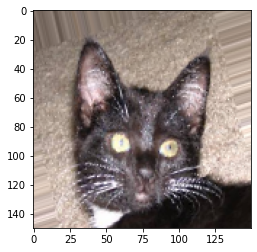

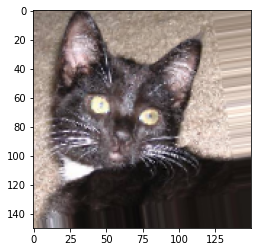

In [0]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if not i%4:
    break
plt.show()

In [0]:
model = models.Sequential([
                           layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128,(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(128,(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dropout(0.5), # 드롭아웃 층 추가
                           layers.Dense(512,activation='relu'),
                           layers.Dense(1, activation='sigmoid')                                                
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 1583s 16s/step - loss: 0.6927 - acc: 0.5115 - val_loss: 0.6706 - val_acc: 0.5650
Epoch 2/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6825 - acc: 0.5610 - val_loss: 0.6452 - val_acc: 0.6150
Epoch 3/100
100/100 [==============================] - 18s 185ms/step - loss: 0.6597 - acc: 0.6085 - val_loss: 0.7495 - val_acc: 0.5380
Epoch 4/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6434 - acc: 0.6240 - val_loss: 0.5527 - val_acc: 0.6170
Epoch 5/100
100/100 [==============================] - 18s 182ms/step - loss: 0.6214 - acc: 0.6570 - val_loss: 0.5719 - val_acc: 0.6840
Epoch 6/100
100/100 [==============================] - 18s 181ms/step - loss: 0.5938 - acc: 0.6785 - val_loss: 0.6874 - val_acc: 0.5920
Epoch 7/100
100/100 [==============================] - 18s 181ms/step - loss: 0.5886 - acc: 0.6870 -

In [0]:
# 사전 훈련된 네트워크 이용 - VGG16
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [0]:
# 방법 1. 이미지와 레이블을 넘파이 배열로 추출

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i+=1
    if i*batch_size >= sample_count:
      break
  return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

model = models.Sequential([
    layers.Dense(256, activation='relu', input_dim=4*4*512),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 259us/step - loss: 0.6156 - acc: 0.6525 - val_loss: 0.4480 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 0s 221us/step - loss: 0.4300 - acc: 0.8030 - val_loss: 0.3800 - val_acc: 0.8320
Epoch 3/30
2000/2000 [==============================] - 0s 216us/step - loss: 0.3555 - acc: 0.8500 - val_loss: 0.3295 - val_acc: 0.8600
Epoch 4/30
2000/2000 [==============================] - 0s 222us/step - loss: 0.3126 - acc: 0.8710 - val_loss: 0.3001 - val_acc: 0.8840
Epoch 5/30
2000/2000 [==============================] - 0s 217us/step - loss: 0.2819 - acc: 0.8865 - val_loss: 0.2836 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 0s 222us/step - loss: 0.2636 - acc: 0.8920 - val_loss: 0.2756 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 0s 214us/step - loss: 0.2415 - acc: 0.9050 - val_loss: 0.2645 - val_acc: 0.8980


In [0]:
# 데이터 증식 사용

model = models.Sequential([
                           conv_base,
                           layers.Flatten(),
                           layers.Dense(256, activation='relu'),
                           layers.Dense(1, activation='sigmoid')                         
])

conv_base.trainable=False # 합성곱 기반 층 동결
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
 - 20s - loss: 0.6151 - acc: 0.6620 - val_loss: 0.4289 - val_acc: 0.8310
Epoch 2/30
 - 19s - loss: 0.4886 - acc: 0.7820 - val_loss: 0.3872 - val_acc: 0.8140
Epoch 3/30
 - 19s - loss: 0.4429 - acc: 0.8025 - val_loss: 0.2392 - val_acc: 0.8720
Epoch 4/30
 - 19s - loss: 0.4074 - acc: 0.8265 - val_loss: 0.2778 - val_acc: 0.8840
Epoch 5/30
 - 19s - loss: 0.3853 - acc: 0.8315 - val_loss: 0.3911 - val_acc: 0.8550
Epoch 6/30
 - 19s - loss: 0.3720 - acc: 0.8420 - val_loss: 0.1229 - val_acc: 0.8920
Epoch 7/30
 - 19s - loss: 0.3522 - acc: 0.8500 - val_loss: 0.3372 - val_acc: 0.8990
Epoch 8/30
 - 19s - loss: 0.3598 - acc: 0.8450 - val_loss: 0.5103 - val_acc: 0.8950
Epoch 9/30
 - 19s - loss: 0.3398 - acc: 0.8460 - val_loss: 0.4036 - val_acc: 0.9050
Epoch 10/30
 - 19s - loss: 0.3309 - acc: 0.8555 - val_loss: 0.1426 - val_acc: 0.9010
Epoch 11/30
 - 20s - loss: 0.3252 - acc: 0.8605 - val_loss: 0.3154 - val_ac

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
# fine-tuning : block5_conv* 동결 해제

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 22s 223ms/step - loss: 0.2956 - acc: 0.8775 - val_loss: 0.1440 - val_acc: 0.9250
Epoch 2/100
100/100 [==============================] - 20s 199ms/step - loss: 0.2529 - acc: 0.8955 - val_loss: 0.4430 - val_acc: 0.9160
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 0.2367 - acc: 0.8995 - val_loss: 0.0420 - val_acc: 0.9400
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.2238 - acc: 0.9125 - val_loss: 0.0453 - val_acc: 0.9530
Epoch 5/100
100/100 [==============================] - 20s 201ms/step - loss: 0.2097 - acc: 0.9155 - val_loss: 0.0426 - val_acc: 0.9570
Epoch 6/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1870 - acc: 0.9175 - val_loss: 0.2068 - val_acc: 0.9530
Epoch 7/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1793 - acc: 0.9315 - val_loss: 0.2937 - val_acc: 0.9710
Epoch 8/100
100/100 [===========================

In [0]:
# 컨브넷 시각화


from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras.preprocessing import image

img_path = test_cats_dir + '/cat.1700.jpg'

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


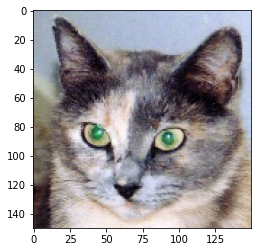

In [0]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

In [0]:
def draw_channel(layer,channel):
  plt.matshow(activations[layer][0,:,:,channel], cmap='viridis')
  plt.show()

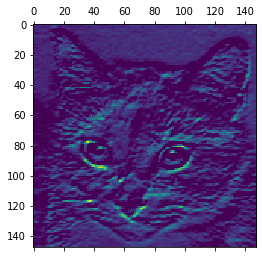

In [0]:
draw_channel(0,0)

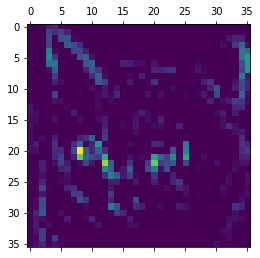

In [0]:
draw_channel(3,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


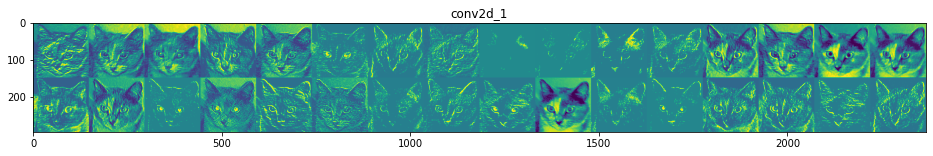

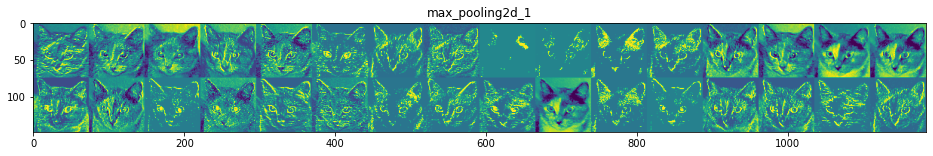

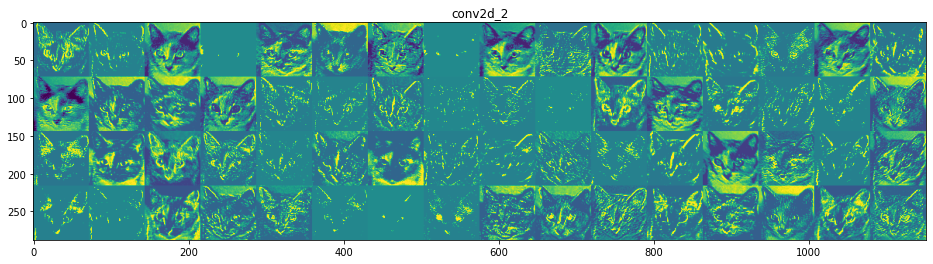

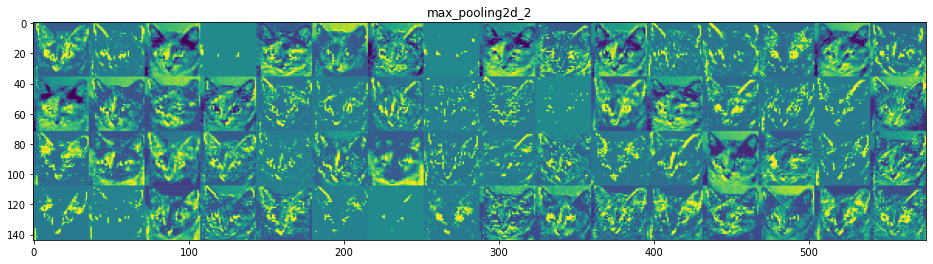

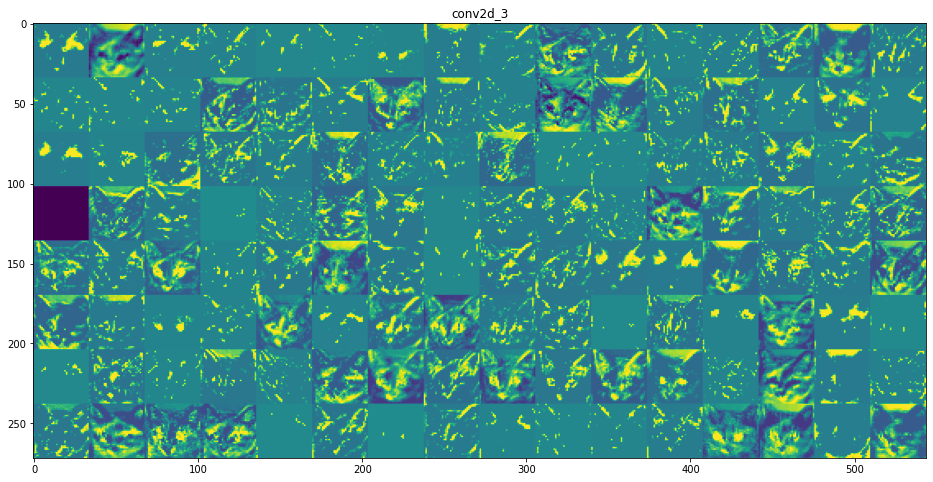

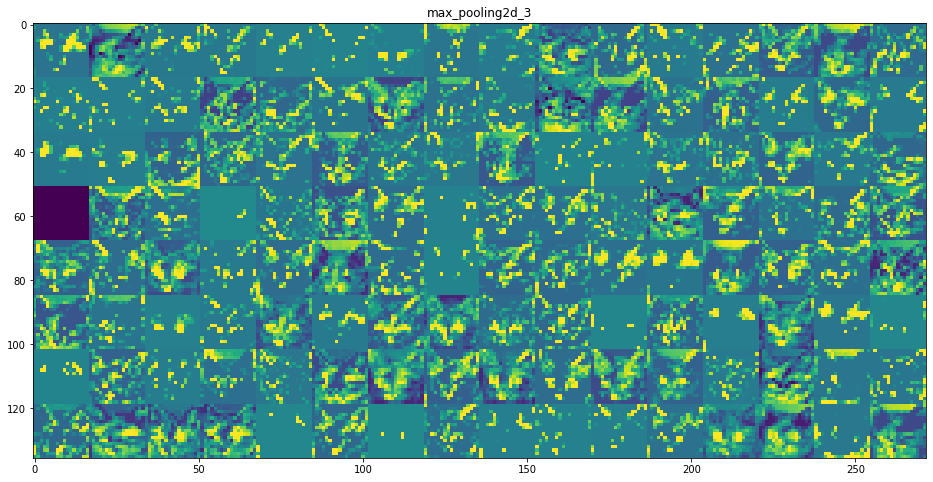

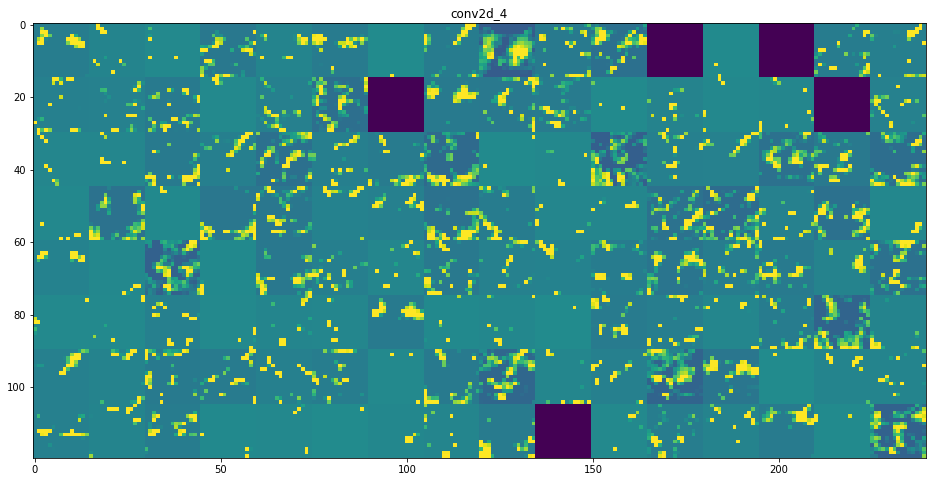

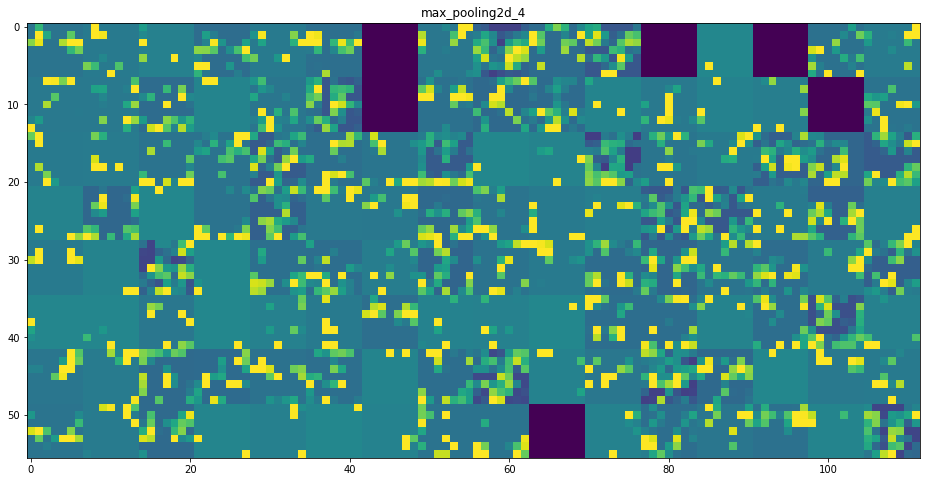

In [0]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features//images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
  
  scale = 1./size
  plt.figure(figsize=(scale*display_grid.shape[1],
                      scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto',cmap='viridis')

plt.show()


In [1]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads)))+ 1e-5)

iterate = K.function([model.input],[loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1,150,150,3))])

input_img_data = np.random.random((1,150,150,3))*20 + 128.

step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])

  input_img_data += grads_value*step

In [0]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x,0,1)

  x *= 255
  x = np.clip(x,0,255).astype('uint8')
  return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
  layer_ouput = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])

  grads = K.gradients(loss, model.input)[0]

  grads/= K.sqrt(K.mean(K.square(grads)))+1e-5
  iterate = K.function([model.input],[loss,grads])

  input_img_data = np.random.random((1,size,size,3))*20 + 128.

  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

  img = input_img_data[0]
  return deprocess_image(img)

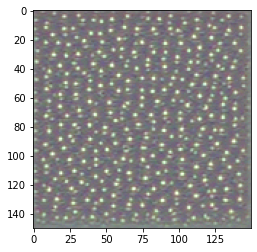

In [13]:
import matplotlib.pyplot as plt

plt.imshow(generate_pattern('block3_conv1',0))

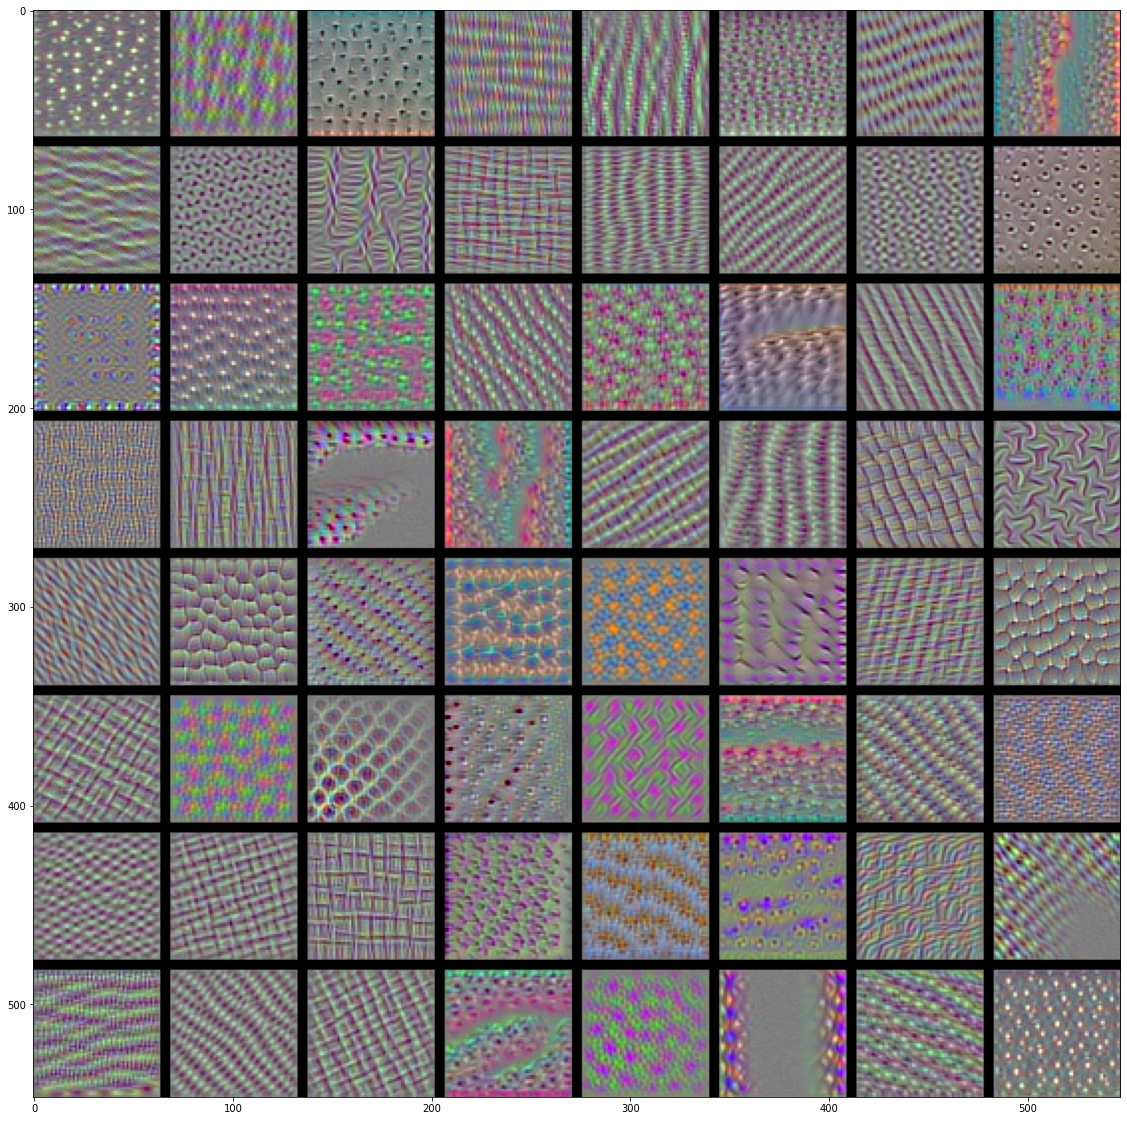

In [14]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3), dtype='uint8')

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end, vertical_start: vertical_end,:] = filter_img

plt.figure(figsize = (20,20))
plt.imshow(results)

In [15]:
model = VGG16(weights = 'imagenet')

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = './drive/My Drive/datasets/zebra.jpg'

img = image.load_img(img_path, target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

553467904/553467096 [==============================] - 17s 0us/step


In [16]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds,top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02391049', 'zebra', 0.9990269), ('n02422106', 'hartebeest', 0.00039938398), ('n02423022', 'gazelle', 0.00020880403)]


In [17]:
np.argmax(preds[0])

340

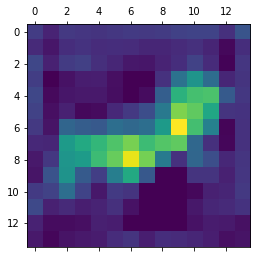

In [22]:
prediction_output = model.output[:,340]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(prediction_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [23]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('./drive/My Drive/datasets/zebra_cam.jpg', superimposed_img)

True

In [0]:
def prediction_and_heatmap(img_path):
  img_path = img_path

  img = image.load_img(img_path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds,top=3)[0])

  argmax = np.argmax(preds[0])

  prediction_output = model.output[:,argmax]
  last_conv_layer = model.get_layer('block5_conv3')
  grads = K.gradients(prediction_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0,1,2))
  iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)

  heatmap = np.maximum(heatmap,0)
  heatmap /= np.max(heatmap)

  img = cv2.imread(img_path)
  heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.4 + img
  root_path = './drive/My Drive/datasets/test_image/'
  write_path = root_path + 'cam_' + img_path.split('/')[-1]
  cv2.imwrite(write_path, superimposed_img)

In [37]:
prediction_and_heatmap('./drive/My Drive/datasets/test_image/horse.jpg')

Predicted: [('n02090622', 'borzoi', 0.20191365), ('n02091244', 'Ibizan_hound', 0.17447828), ('n02104029', 'kuvasz', 0.06126358)]
